# Model

In [1]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical


<h3 style= "color:blue;"> Importing Data Set </h3>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load your dataframe
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Research/Method 1 - Articles /Preprocessed.csv",index_col=[0])

In [4]:
# change both types into string
df['content'] = df['content'].astype('str')
df['fileclass'] = df['fileclass'].astype('str')

In [5]:
# remove duplicates, leaving the first record
df = df.drop_duplicates(subset=['content'],keep="first")

<b> Before moving ahead let's convert the fileclass into integer format, as it will make our work easy!!</b>

In [6]:
# Convert filecalss into int values
classes={'ChildProtection':0,'Cybersecurity':1,'DataPrivacy':2,'DataSystemsDevelopment':3,
         'DigitalFinance':4,'DigitalInclusion':5,'DigitalInformatioServices':6,
         'DigitalInfrastructure':7,'DigitalLiteracy':8,'DigitalServices':9,'Egovernment':10,'Upskilling':11
         }
# map the filecalss values
df['classes']=df['fileclass'].map(classes)

# drop the fileclass axis
df.drop(['fileclass'], axis=1,inplace=True)

In [7]:
texts = df['content'].values
labels = df['classes'].values

# Split the data into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.3, random_state=42)

In [8]:
# Initialize the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

# Pad sequences
max_length = 5000  # maximum sequence length
train_data = pad_sequences(train_sequences, maxlen=max_length)
test_data = pad_sequences(test_sequences, maxlen=max_length)

In [9]:
num_classes = max(df['classes']) + 1  # Calculate the number of classes
# Determine vocabulary size
vocab_size = len(tokenizer.word_index) + 1
# Define the embedding dimension
embedding_dim = 100  # Adjust the value as needed


# Convert the label values to categorical format
train_labels = to_categorical(train_labels, num_classes=num_classes)
test_labels = to_categorical(test_labels, num_classes=num_classes)

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(units=64))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5000, 100)         1929400   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 12)                780       
                                                                 
Total params: 1972420 (7.52 MB)
Trainable params: 1972420 (7.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
from tensorflow.keras.utils import plot_model

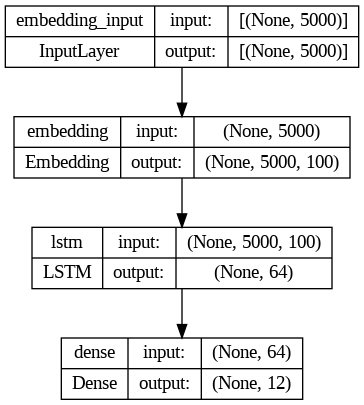

In [12]:
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
# Train the model
model.fit(train_data, train_labels, epochs=10, batch_size=64, validation_data=(test_data, test_labels))

Epoch 1/10
7/7 [==============================] - 79s 10s/step - loss: 2.4749 - accuracy: 0.2023 - val_loss: 2.4574 - val_accuracy: 0.2649
Epoch 2/10
7/7 [==============================] - 67s 10s/step - loss: 2.4030 - accuracy: 0.2349 - val_loss: 2.3228 - val_accuracy: 0.2649
Epoch 3/10
7/7 [==============================] - 73s 11s/step - loss: 2.2549 - accuracy: 0.2326 - val_loss: 2.2802 - val_accuracy: 0.2649
Epoch 4/10
7/7 [==============================] - 67s 9s/step - loss: 2.1795 - accuracy: 0.2326 - val_loss: 2.2658 - val_accuracy: 0.2649
Epoch 5/10
7/7 [==============================] - 71s 10s/step - loss: 2.0759 - accuracy: 0.2326 - val_loss: 2.2179 - val_accuracy: 0.2649
Epoch 6/10
7/7 [==============================] - 73s 10s/step - loss: 1.9032 - accuracy: 0.2767 - val_loss: 2.1450 - val_accuracy: 0.2865
Epoch 7/10
7/7 [==============================] - 67s 10s/step - loss: 1.7384 - accuracy: 0.4628 - val_loss: 2.1823 - val_accuracy: 0.2865
Epoch 8/10
7/7 [============

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_data, test_labels)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

6/6 [==============================] - 4s 648ms/step - loss: 2.1912 - accuracy: 0.2703
Test Loss: 2.1911802291870117
Test Accuracy: 0.2702702581882477


In [ ]:
from sklearn.metrics import classification_report

# Assuming you have already trained your model and obtained predictions
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

# Generate classification report
report = classification_report(np.argmax(test_labels, axis=1), predicted_labels)

print(report)

6/6 [==============================] - 5s 640ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         9
           3       0.18      0.39      0.25        28
           4       0.51      0.71      0.59        49
           5       0.15      0.14      0.14        22
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         9
          10       0.33      0.05      0.09        19
          11       0.00      0.00      0.00        10

    accuracy                           0.27       185
   macro avg       0.10      0.11      0.09       185
weighted avg       0.21      0.27      0.22       185



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
